In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

mizbahuddinrafat_retail_dataset_path = kagglehub.dataset_download('mizbahuddinrafat/retail-dataset')
varshnidevi_ecommerce_behavior_data_from_multi_category_store_path = kagglehub.notebook_output_download('varshnidevi/ecommerce-behavior-data-from-multi-category-store')

print('Data source import complete.')


In [ ]:
import pandas as pd

df = pd.read_csv("/kaggle/input/retail-dataset/online_retail_II.csv",encoding='ISO-8859-1')
df.info()
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<bound method NDFrame.describe of        Invoice StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...        ...       ...                                  ...       ...   
541905  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
541909  581587      POST                              POSTAGE         1   

             InvoiceDate  Price  Customer ID         Country  
0 

In [ ]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [ ]:
df.shape

(541910, 8)

In [ ]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01/12/2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01/12/2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01/12/2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01/12/2010 08:28,1.85,17850.0,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,01/12/2010 08:34,4.25,13047.0,United Kingdom


Handling Missing Values

In [ ]:
rows_before = len(df)
df = df.dropna(subset=['Customer ID'])
print(f"Removed {rows_before - len(df)} rows with missing Customer ID.")

Removed 135080 rows with missing Customer ID.


 Removing Invalid Transactions

In [ ]:
rows_before = len(df)
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]
print(f"Removed {rows_before - len(df)} rows with non-positive Quantity or Price.")

Removed 8945 rows with non-positive Quantity or Price.


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],dayfirst=True)
df = df.copy()
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour
df = df.copy()
df['TotalPrice'] = df['Quantity'] * df['Price']

In [ ]:
rows_before = len(df)
df.drop_duplicates(inplace=True)
print(f"Removed {rows_before - len(df)} duplicate rows.")

Removed 5192 duplicate rows.


In [ ]:
import dask.dataframe as dd
ddf = dd.read_csv('/kaggle/input/retail-dataset/online_retail_II.csv',sample =10000000000000,
                  encoding='cp1252',
                 dtype={
        'Customer ID': 'float64',
        'Invoice': 'object' }
    ,)

In [ ]:
ddf.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01/12/2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01/12/2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01/12/2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01/12/2010 08:28,1.85,17850.0,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,01/12/2010 08:34,4.25,13047.0,United Kingdom


 Exploratory Data Analysis (Pandas)

In [ ]:
#Monthly Sales
monthly_sales = df.groupby('Month')['TotalPrice'].sum()
print("Monthly sales:", monthly_sales)

Monthly sales: Month
1      568101.310
2      446084.920
3      594081.760
4      468374.331
5      677355.150
6      660046.050
7      598962.901
8      644051.040
9      950690.202
10    1035642.450
11    1156205.610
12    1087631.170
Name: TotalPrice, dtype: float64


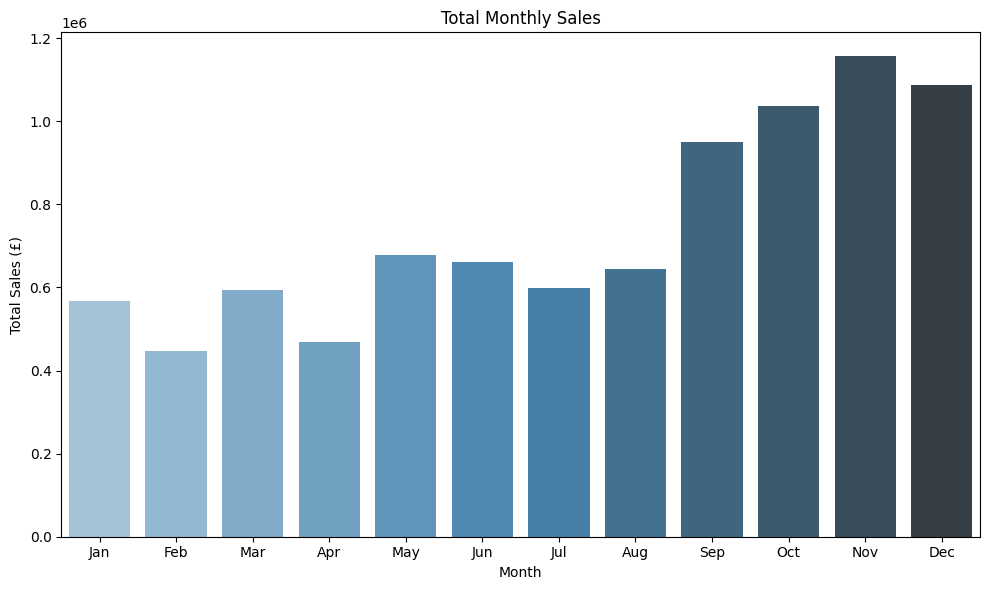

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index for plotting
monthly_sales_df = monthly_sales.reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_sales_df, x='Month', y='TotalPrice', palette='Blues_d')
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.tight_layout()
plt.show()


In [ ]:
#Top 10 Products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop Products:\n", top_products)


Top Products:
 Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64


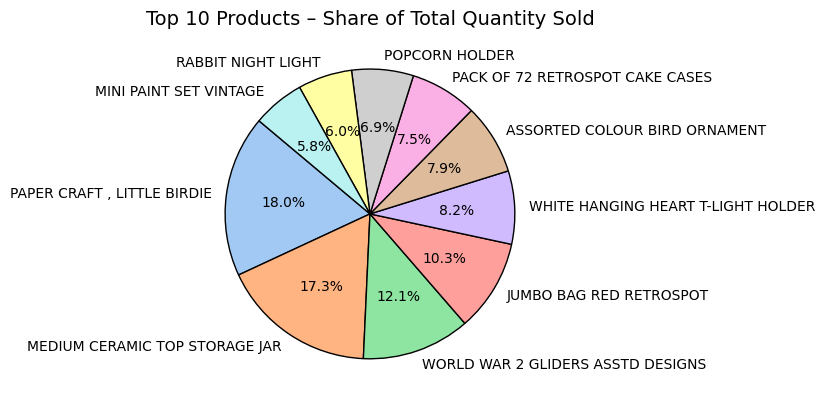

In [ ]:
import matplotlib.pyplot as plt

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_products.values,
    labels=top_products.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Top 10 Products – Share of Total Quantity Sold', fontsize=14)
plt.tight_layout()
plt.show()


Customer Segmentation: RFM + K-Means

In [ ]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'TotalPrice': 'Monetary'})

# Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

rfm_log = np.log1p(rfm)
rfm_scaled = StandardScaler().fit_transform(rfm_log)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
print(rfm.groupby('Cluster').mean())
print(rfm['Cluster'])


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



            Recency  Frequency     Monetary
Cluster                                    
0         12.210600  13.708508  8059.183626
1        182.914535   1.316282   338.711685
2         18.011976   2.152096   546.784898
3         71.357566   4.054100  1782.985641
Customer ID
12346.0    3
12347.0    0
12348.0    3
12349.0    2
12350.0    1
          ..
18280.0    1
18281.0    1
18282.0    2
18283.0    0
18287.0    3
Name: Cluster, Length: 4338, dtype: int32


In [ ]:
from sklearn.metrics import silhouette_score

# RFM Clustering (your existing code)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate': 'Recency', 'Invoice': 'Frequency', 'TotalPrice': 'Monetary'})

# Preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np

rfm_log = np.log1p(rfm)
rfm_scaled = StandardScaler().fit_transform(rfm_log)

# KMeans Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Calculate Silhouette Score
score = silhouette_score(rfm_scaled, rfm['Cluster'])
print(f"Silhouette Score: {score:.4f}")




/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score: 0.6572


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

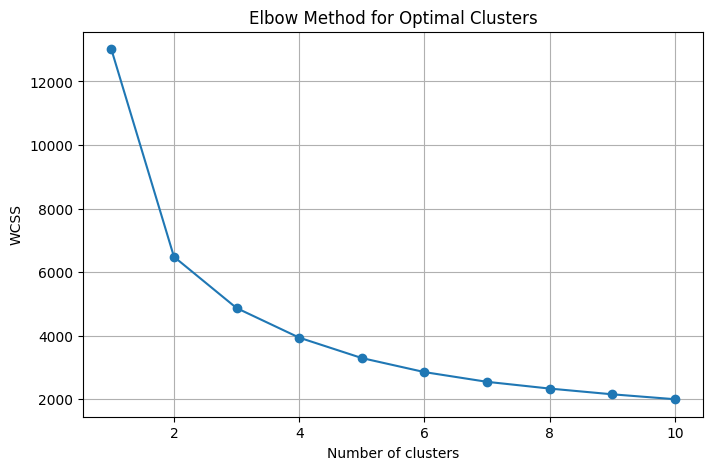

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


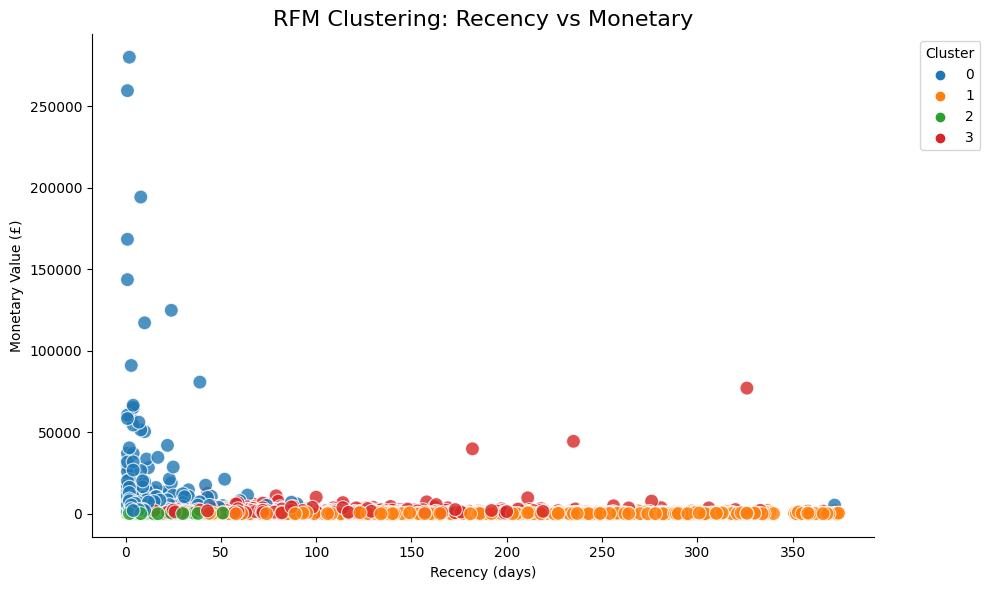

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rfm.reset_index(),
    x='Recency',
    y='Monetary',
    hue='Cluster',
    palette='tab10',
    alpha=0.8,
    edgecolor='w',
    s=100
)
plt.title('RFM Clustering: Recency vs Monetary', fontsize=16)
plt.xlabel('Recency (days)')
plt.ylabel('Monetary Value (£)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()


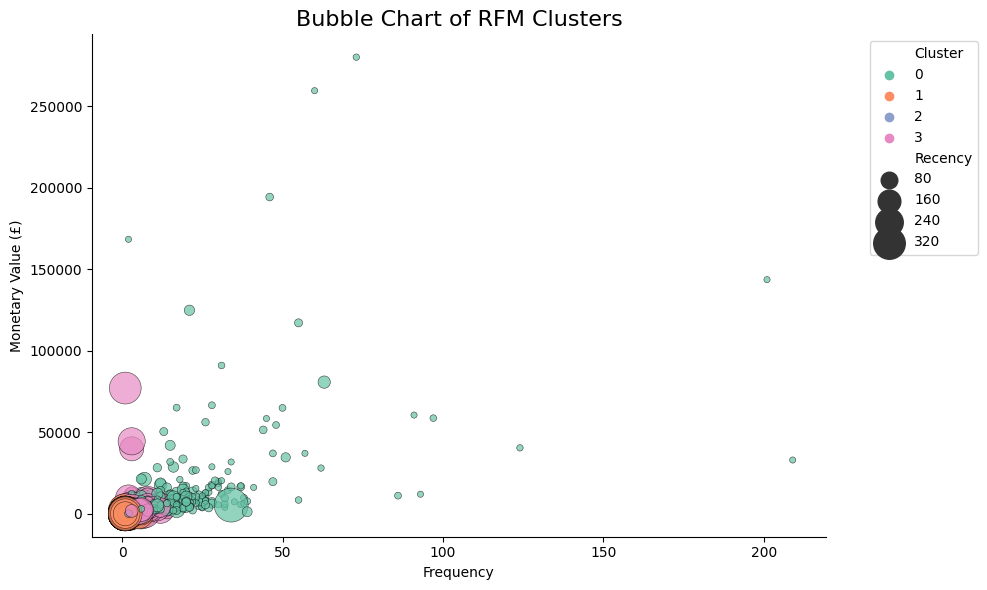

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rfm.reset_index(),
    x='Frequency',
    y='Monetary',
    size='Recency',
    hue='Cluster',
    palette='Set2',
    sizes=(20, 600),
    alpha=0.7,
    edgecolor='black'
)
plt.title('Bubble Chart of RFM Clusters', fontsize=16)
plt.xlabel('Frequency')
plt.ylabel('Monetary Value (£)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()


Sales Forecasting (Linear Regression)

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('/kaggle/input/retail-dataset/online_retail_II.csv', encoding='latin1', parse_dates=['InvoiceDate'], dayfirst=True)
df['TotalPrice'] = df['Quantity'] * df['Price']

# Feature Engineering - Monthly Aggregation
monthly_sales = df.set_index('InvoiceDate').resample('ME').agg({
    'TotalPrice': 'sum',
    'Quantity': 'sum',
    'Invoice': 'nunique',
    'Customer ID': 'nunique'
}).reset_index()
monthly_sales.columns = ['Date', 'Sales', 'TotalQuantity', 'TransactionCount', 'UniqueCustomers']


monthly_sales['Month'] = monthly_sales['Date'].dt.month
monthly_sales['Year'] = monthly_sales['Date'].dt.year
monthly_sales['DaysInMonth'] = monthly_sales['Date'].dt.days_in_month
monthly_sales['SalesPerTransaction'] = monthly_sales['Sales'] / monthly_sales['TransactionCount']

# Lag features
monthly_sales = monthly_sales.sort_values('Date')
monthly_sales['PrevMonthSales'] = monthly_sales['Sales'].shift(1)
monthly_sales = monthly_sales.dropna()

X = monthly_sales[['Month', 'Year', 'TransactionCount', 'UniqueCustomers', 'PrevMonthSales']]
y = monthly_sales['Sales']

split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

# Feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_
}).sort_values('Importance', key=abs, ascending=False)
print("\nFeature Importance:\n", coefficients)

MSE: 6156055312.48
R² Score: 0.9657

Feature Importance:
             Feature    Importance
0             Month -1.060921e+04
3   UniqueCustomers  1.700962e+03
2  TransactionCount -3.242844e+02
4    PrevMonthSales  1.631199e-01
1              Year -1.983043e-08


/tmp/ipykernel_35/1372171819.py:35: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.11/dist-packages/skl

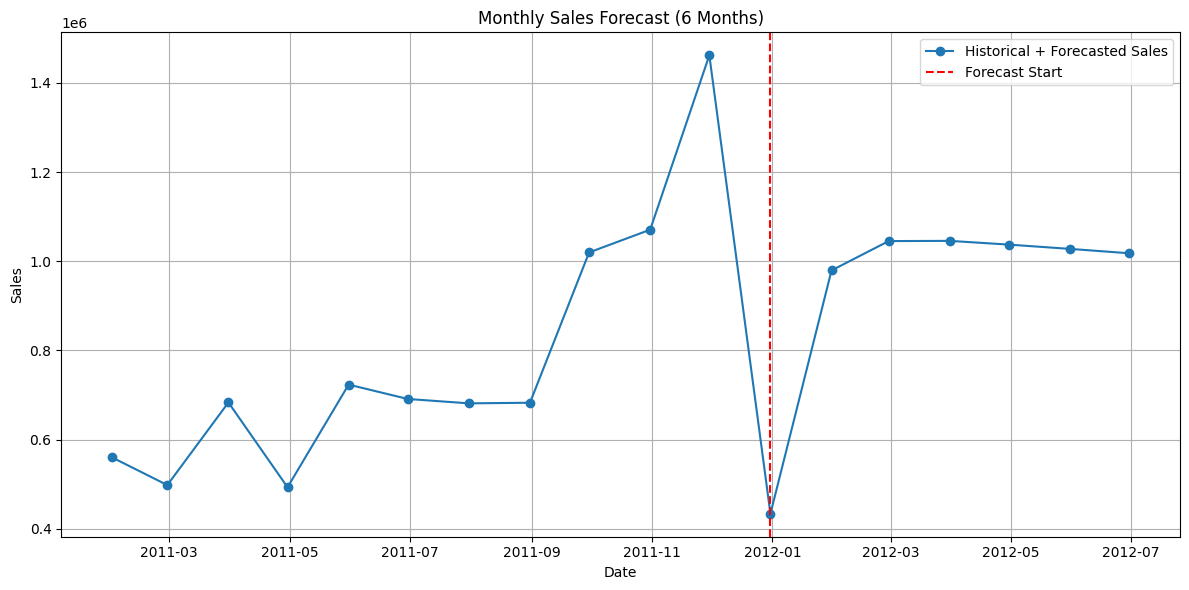

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load and preprocess data
df = pd.read_csv('/kaggle/input/retail-dataset/online_retail_II.csv', encoding='latin1', parse_dates=['InvoiceDate'], dayfirst=True)
df['TotalPrice'] = df['Quantity'] * df['Price']

monthly_sales = df.set_index('InvoiceDate').resample('ME').agg({
    'TotalPrice': 'sum',
    'Quantity': 'sum',
    'Invoice': 'nunique',
    'Customer ID': 'nunique'
}).reset_index()

monthly_sales.columns = ['Date', 'Sales', 'TotalQuantity', 'TransactionCount', 'UniqueCustomers']
monthly_sales['Month'] = monthly_sales['Date'].dt.month
monthly_sales['Year'] = monthly_sales['Date'].dt.year
monthly_sales['DaysInMonth'] = monthly_sales['Date'].dt.days_in_month
monthly_sales['SalesPerTransaction'] = monthly_sales['Sales'] / monthly_sales['TransactionCount']
monthly_sales = monthly_sales.sort_values('Date')
monthly_sales['PrevMonthSales'] = monthly_sales['Sales'].shift(1)
monthly_sales = monthly_sales.dropna()

# Model training
X = monthly_sales[['Month', 'Year', 'TransactionCount', 'UniqueCustomers', 'PrevMonthSales']]
y = monthly_sales['Sales']
model = LinearRegression()
model.fit(X, y)

# Create 6 future months for forecasting
last_date = monthly_sales['Date'].max()
future_dates = pd.date_range(last_date + pd.offsets.MonthEnd(1), periods=6, freq='M')
future_df = pd.DataFrame({'Date': future_dates})
future_df['Month'] = future_df['Date'].dt.month
future_df['Year'] = future_df['Date'].dt.year
future_df['DaysInMonth'] = future_df['Date'].dt.days_in_month

# Use average of last 3 months for placeholders
last_values = monthly_sales.tail(3)
future_df['TransactionCount'] = last_values['TransactionCount'].mean()
future_df['UniqueCustomers'] = last_values['UniqueCustomers'].mean()

# Use previous month’s actual sales for forecasting
prev_sales = monthly_sales['Sales'].iloc[-1]
future_df['PrevMonthSales'] = 0.0
for i in range(len(future_df)):
    future_df.loc[i, 'PrevMonthSales'] = prev_sales
    features = future_df.loc[i, ['Month', 'Year', 'TransactionCount', 'UniqueCustomers', 'PrevMonthSales']].values.reshape(1, -1)
    prediction = model.predict(features)[0]
    prev_sales = prediction
    future_df.loc[i, 'Sales'] = prediction

# Combine historical and forecasted data
forecasted = future_df[['Date', 'Sales']]
combined = pd.concat([monthly_sales[['Date', 'Sales']], forecasted])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(combined['Date'], combined['Sales'], label='Historical + Forecasted Sales', marker='o')
plt.axvline(x=monthly_sales['Date'].max(), color='red', linestyle='--', label='Forecast Start')
plt.title('Monthly Sales Forecast (6 Months)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Geographic Analysis

In [ ]:
country_sales = df.groupby('Country')['Price'].sum().sort_values(ascending=False)
print(country_sales)

Country
United Kingdom          2245715.474
EIRE                      48447.190
France                    43049.990
Germany                   37666.000
Singapore                 25108.890
Portugal                  13037.540
Spain                     12633.450
Hong Kong                 12241.500
Belgium                    7540.130
Switzerland                6813.690
Norway                     6529.060
Netherlands                6492.550
Australia                  4054.750
Cyprus                     3920.070
Italy                      3879.390
Finland                    3786.850
Channel Islands            3738.550
Sweden                     1806.830
Austria                    1701.520
Poland                     1422.270
Denmark                    1266.950
Unspecified                1204.010
Israel                     1079.040
Canada                      910.580
Japan                       814.860
Greece                      713.290
Malta                       666.010
USA                 

In [ ]:
import plotly.express as px
import pandas as pd

# Prepare data (assumes 'Country' and 'Price' are in country_sales_df)
country_sales_df = country_sales.reset_index()
country_sales_df.columns = ['Country', 'Sales']

# Plot
fig = px.choropleth(
    country_sales_df,
    locations='Country',
    locationmode='country names',
    color='Sales',
    color_continuous_scale='Blues',
    title='Global Sales Distribution by Country',
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False),
    coloraxis_colorbar=dict(title='Total Sales (£)')
)

fig.show()


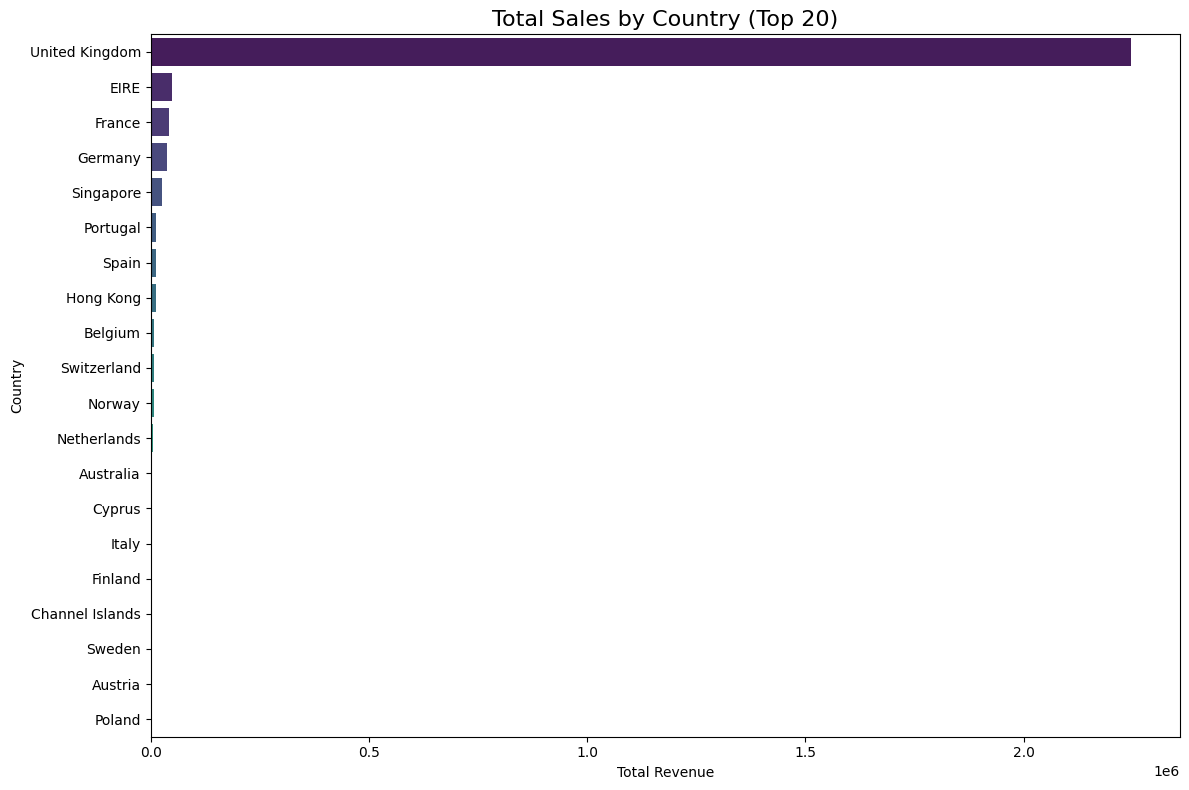

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group and sort country sales
country_sales = df.groupby('Country')['Price'].sum().sort_values(ascending=False)

# Plot top 20 countries for clarity
top_countries = country_sales.head(20).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=top_countries, x='Price', y='Country', palette='viridis')
plt.title('Total Sales by Country (Top 20)', fontsize=16)
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


Linear Regression visualisations

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



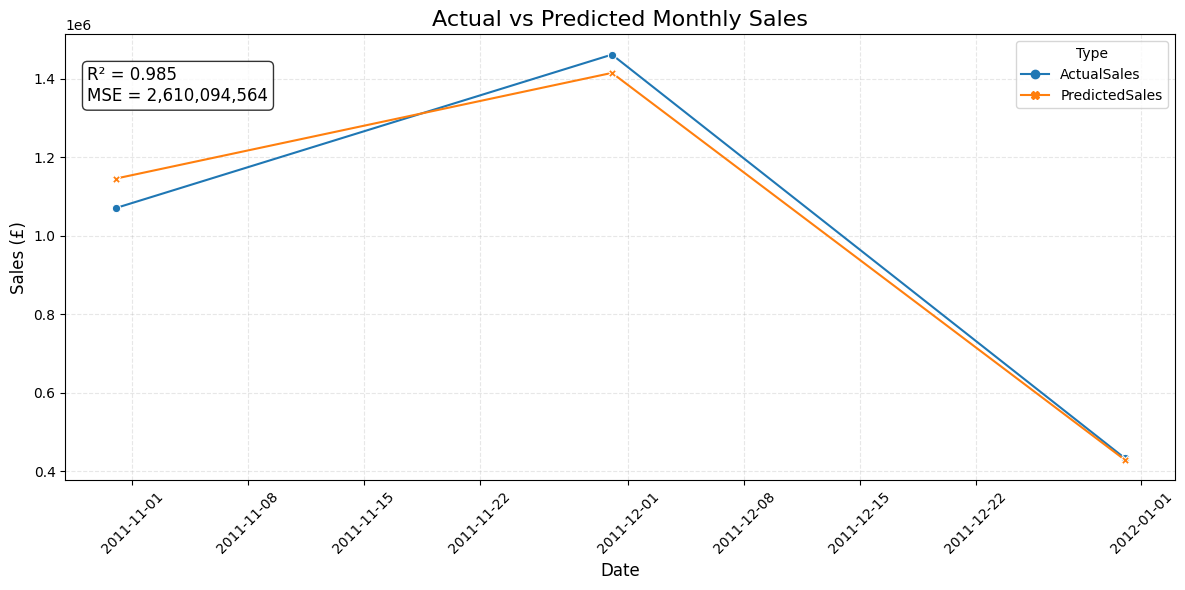

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)  # Define R²
mse = mean_squared_error(y_test, y_pred)  # Define MSE

forecast_df = X_test.copy()
forecast_df['ActualSales'] = y_test.values
forecast_df['PredictedSales'] = y_pred
forecast_df['Date'] = monthly_sales['Date'].iloc[split_idx:].values

plot_df = forecast_df.melt(id_vars='Date',
                          value_vars=['ActualSales', 'PredictedSales'],
                          var_name='Type',
                          value_name='Sales')

# --- Plot with Metrics Annotation ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_df, x='Date', y='Sales', hue='Type',
             style='Type', markers=True, dashes=False)

# Add metrics box
metrics_text = f"R² = {r2:.3f}\nMSE = {mse:,.0f}"
plt.annotate(metrics_text,
             xy=(0.02, 0.85),
             xycoords='axes fraction',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
             fontsize=12)

plt.title('Actual vs Predicted Monthly Sales', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales (£)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

Average Sales Per Transaction by Month

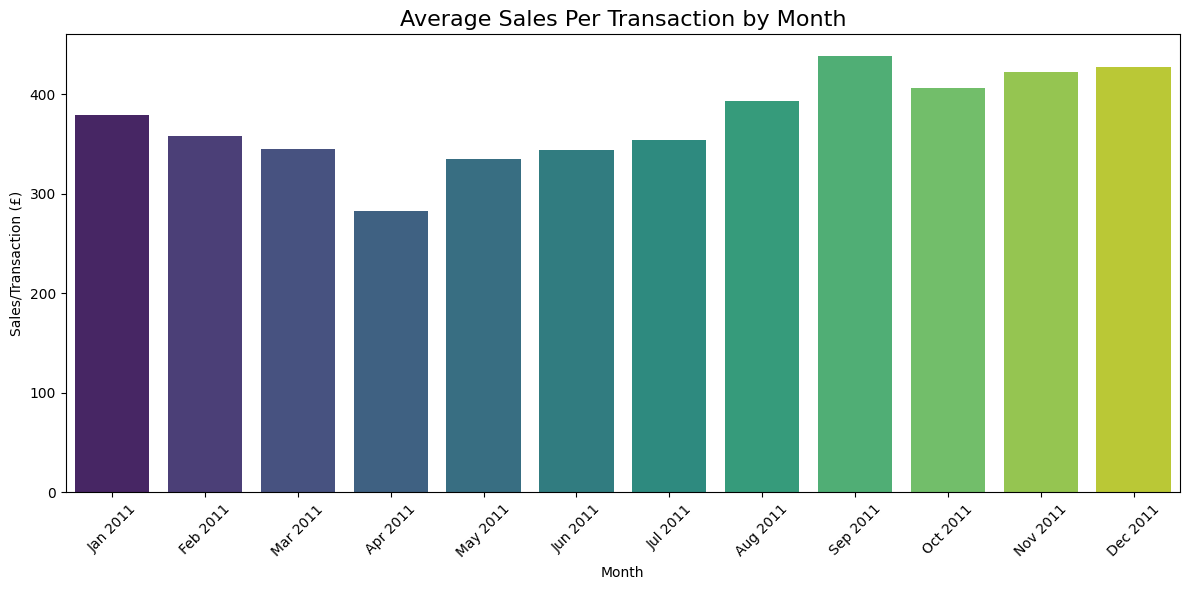

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales['Date'].dt.strftime('%b %Y'), y='SalesPerTransaction', data=monthly_sales, palette='viridis')
plt.title('Average Sales Per Transaction by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Sales/Transaction (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Bubble Chart: Transactions vs Unique Customers (Bubble = Sales)

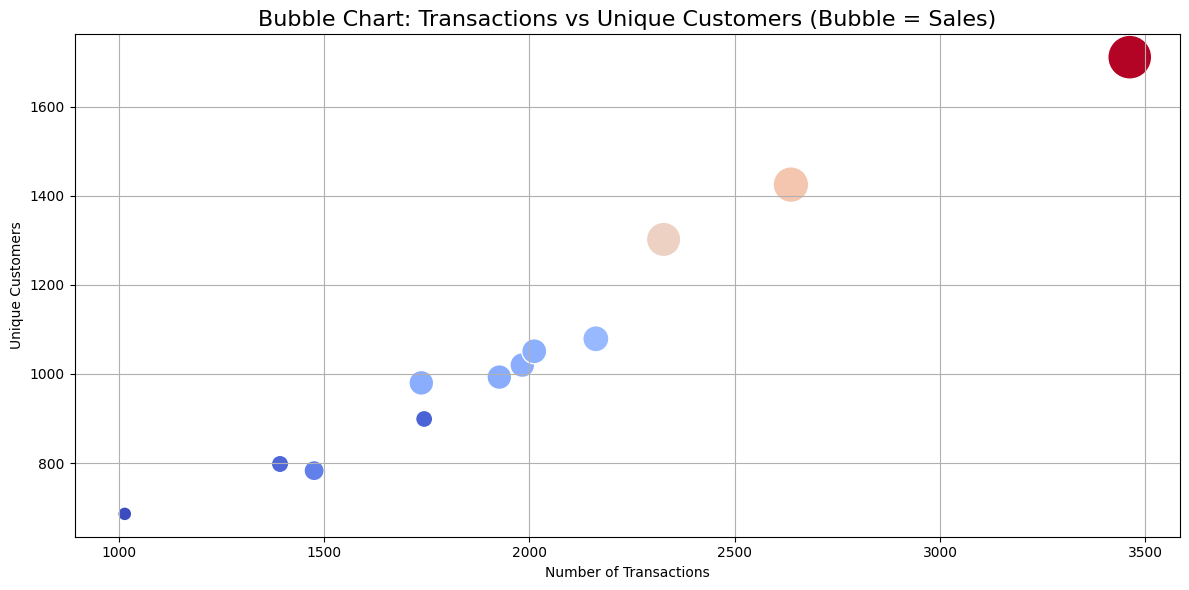

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='TransactionCount',
    y='UniqueCustomers',
    size='Sales',
    data=monthly_sales,
    sizes=(100, 1000),
    hue='Sales',
    palette='coolwarm',
    legend=False
)
plt.title('Bubble Chart: Transactions vs Unique Customers (Bubble = Sales)', fontsize=16)
plt.xlabel('Number of Transactions')
plt.ylabel('Unique Customers')
plt.grid(True)
plt.tight_layout()
plt.show()


Correlation Heatmap of Key Metrics

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning:

invalid value encountered in less



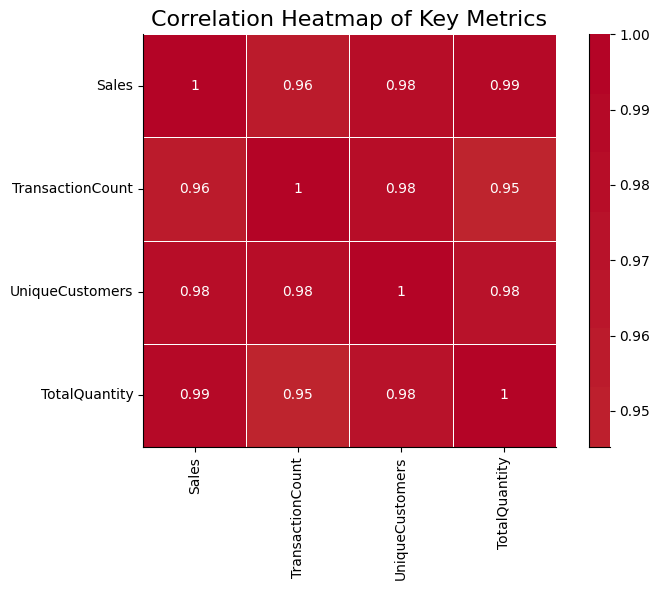

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    monthly_sales[['Sales', 'TransactionCount', 'UniqueCustomers', 'TotalQuantity']].corr(),
    annot=True,
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    square=True
)
plt.title('Correlation Heatmap of Key Metrics', fontsize=16)
sns.despine()
plt.tight_layout()
plt.show()
